## Importing Required Libraries

In [1]:
!pip install opencv-python

In [2]:
import pandas as pd
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage import io, color, img_as_ubyte
import os    
import cv2

In [3]:
df = pd.DataFrame(columns=['Contrast Feature','Homogeneity Feature','Energy Feature','Correlation Feature'])

In [4]:
matrix1 = []

### Matrix

In [5]:
path_of_images = r"Batik100-129"
list_of_images = sorted([f for f in os.listdir(path_of_images) if f.endswith('.png')])
for image in list_of_images:
    img = cv2.imread(os.path.join(path_of_images, image))
    gray = color.rgb2gray(img)
    image = img_as_ubyte(gray)# Becomes 8-bit unsigned integer

#This step is similar to data compression, because the 8-bit image contains 256 gray levels, which will cause the calculation of the gray level co-occurrence matrix to be too large, so it is compressed into 16 levels and the gray levels are divided
    bins = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255]) #16-bit
    inds = np.digitize(image, bins)#Returns a matrix with the same size as the image, but the matrix element represents the interval position of the element in the image in the bins, less than 0 is 0, 0-16 is 1, and so on

    max_value = inds.max()+1
    matrix_coocurrence = graycomatrix(inds, #Numpy matrix for co-occurrence matrix calculation
                                  [1],#Step
                                  [0, np.pi/4, np.pi/2, 3*np.pi/4],#Direction angle
                                  levels=max_value, #Co-occurrence matrix order
                                  normed=False, symmetric=False)
#P[i,j,d,theta] returns a four-dimensional matrix, each dimension represents a different meaning
    matrix1.append(matrix_coocurrence)

In [6]:
CF =[]
HF =[]
EF =[]
COR = []

# GLCM properties


In [7]:
for matrix in matrix1:

    def contrast_feature(matrix):
       contrast = graycoprops(matrix, 'contrast')  
       return contrast.flatten()  

    def homogeneity_feature(matrix):
       homogeneity = graycoprops(matrix, 'homogeneity')  
       return homogeneity.flatten()

    def energy_feature(matrix):
       energy = graycoprops(matrix, 'energy') 
       return energy.flatten()

    def correlation_feature(matrix):
       correlation = graycoprops(matrix, 'correlation')  
       return correlation.flatten()

    CF.append(np.mean(contrast_feature(matrix)))
    HF.append(np.mean(homogeneity_feature(matrix)))
    EF.append(np.mean(energy_feature(matrix)))
    COR.append(np.mean(correlation_feature(matrix)))

In [8]:
Features = [CF,HF,EF,COR]
for i,j in zip(df.columns,Features):
    df[i] = j

In [9]:
df.index = [os.path.splitext(f)[0] for f in list_of_images]
df.index.name = 'Image ID'

In [10]:
df

,Contrast Feature,Homogeneity Feature,Energy Feature,Correlation Feature
Image ID,,,,
100a,0.893529,0.878333,0.608779,0.913825
100b,0.837746,0.880559,0.612645,0.918455
101a,0.253216,0.951176,0.791369,0.957006
101b,0.231719,0.954380,0.795854,0.960569
102a,0.480493,0.919077,0.519162,0.967568
102b,0.459462,0.917729,0.511984,0.968636
103a,0.292918,0.950998,0.693319,0.987705
103b,0.277179,0.950676,0.693279,0.988330
104a,0.659056,0.920225,0.521593,0.985930


In [11]:
df.to_csv('Feature Extraction.xlsx')

In [12]:
import base64
from io import BytesIO
from PIL import Image

In [13]:
def add_image_column(dataframe, image_folder_path):
    """Tambahkan kolom gambar ke DataFrame"""
    image_html_list = []
    
    for image_id in dataframe.index:
        image_path = os.path.join(image_folder_path, f"{image_id}.png")
        
        if os.path.exists(image_path):
            try:
                # Baca dan resize gambar
                img = Image.open(image_path)
                img.thumbnail((80, 80), Image.Resampling.LANCZOS)  # Resize untuk tampilan
                
                # Convert ke base64 untuk HTML display
                buffer = BytesIO()
                img.save(buffer, format='PNG')
                img_str = base64.b64encode(buffer.getvalue()).decode()
                
                # Buat HTML img tag
                html_img = f'<img src="data:image/png;base64,{img_str}" style="width:80px; height:80px; object-fit:cover;">'
                image_html_list.append(html_img)
                
            except Exception as e:
                image_html_list.append(f"Error loading image: {str(e)}")
        else:
            image_html_list.append("Image not found")
    
    dataframe['Image Preview'] = image_html_list
    return dataframe


In [14]:
df = add_image_column(df, path_of_images)

In [15]:
print("GLCM Features Results with Image Preview:")
print("=" * 80)
print(df.round(6))  

GLCM Features Results with Image Preview:
          Contrast Feature  Homogeneity Feature  Energy Feature  \
Image ID                                                          
100a              0.893529             0.878333        0.608779   
100b              0.837746             0.880559        0.612645   
101a              0.253216             0.951176        0.791369   
101b              0.231719             0.954380        0.795854   
102a              0.480493             0.919077        0.519162   
102b              0.459462             0.917729        0.511984   
103a              0.292918             0.950998        0.693319   
103b              0.277179             0.950676        0.693279   
104a              0.659056             0.920225        0.521593   
104b              0.626172             0.917797        0.512271   
105a              0.735369             0.955493        0.531024   
105b              0.698306             0.955038        0.527345   
106a              0.

In [16]:
# Function to save dataframe to html
def save_dataframe_as_html(dataframe, filename='glcm_results.html'):
    html_string = dataframe.to_html(escape=False, table_id='glcm_table')

    styled_html = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>GLCM Feature Extraction Results</title>
        <style>
            body {{
                font-family: Arial, sans-serif;
                margin: 20px;
                background-color: #f5f5f5;
            }}
            h1 {{
                color: #333;
                text-align: center;
            }}
            #glcm_table {{
                border-collapse: collapse;
                margin: 25px auto;
                font-size: 0.9em;
                min-width: 800px;
                border-radius: 10px 10px 0 0;
                overflow: hidden;
                box-shadow: 0 0 20px rgba(0,0,0,0.15);
                background-color: white;
            }}
            #glcm_table thead tr {{
                background-color: #2c3e50;
                color: #ffffff;
                text-align: center;
                font-weight: bold;
            }}
            #glcm_table th,
            #glcm_table td {{
                padding: 12px 15px;
                border: 1px solid #dddddd;
                text-align: center;
            }}
            #glcm_table tbody tr {{
                border-bottom: 1px solid #dddddd;
            }}
            #glcm_table tbody tr:nth-of-type(even) {{
                background-color: #f8f9fa;
            }}
            #glcm_table tbody tr:hover {{
                background-color: #e8f4fd;
                transform: scale(1.02);
                transition: all 0.3s ease;
            }}
            .feature-value {{
                font-weight: bold;
                color: #2c3e50;
            }}
        </style>
    </head>
    <body>
        <h1>GLCM Feature Extraction Results</h1>
        <p style="text-align: center; color: #666;">
            Gray Level Co-occurrence Matrix (GLCM) texture features for batik images
        </p>
        {html_string}
    </body>
    </html>
    """
    
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(styled_html)
    
    print(f"\nHTML file saved as: {filename}")
    return filename


In [17]:
# Simpan sebagai HTML
html_file = save_dataframe_as_html(df)


HTML file saved as: glcm_results.html


In [18]:
import matplotlib.pyplot as plt

In [19]:

def plot_feature_comparison(dataframe, max_images=4):
    """Comparison plot of features for the first few images"""
    n_images = min(len(dataframe), max_images)
    
    fig, axes = plt.subplots(2, n_images, figsize=(5*n_images, 10))
    if n_images == 1:
        axes = axes.reshape(-1, 1)
    
    for i, (image_id, row) in enumerate(dataframe.head(n_images).iterrows()):
        image_path = os.path.join(path_of_images, f"{image_id}.png")
        if os.path.exists(image_path):
            img = plt.imread(image_path)
            axes[0, i].imshow(img)
            axes[0, i].set_title(f'Image: {image_id}', fontsize=12, fontweight='bold')
            axes[0, i].axis('off')
        
        features = [
            row['Contrast Feature'],
            row['Homogeneity Feature'], 
            row['Energy Feature'],
            row['Correlation Feature']
        ]
        feature_names = ['Contrast', 'Homogeneity', 'Energy', 'Correlation']
        colors = ['#e74c3c', '#2ecc71', '#3498db', '#f39c12']
        
        bars = axes[1, i].bar(feature_names, features, color=colors, alpha=0.8, edgecolor='black')
        axes[1, i].set_title(f'GLCM Features: {image_id}', fontsize=10)
        axes[1, i].set_ylim(0, max(1, max(features) * 1.1))
        axes[1, i].tick_params(axis='x', rotation=45, labelsize=8)
        axes[1, i].grid(True, alpha=0.3)
        
        for bar, value in zip(bars, features):
            axes[1, i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(features)*0.02,
                           f'{value:.4f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.suptitle('GLCM Texture Feature Analysis for Batik Images', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()



Generating feature comparison plot...


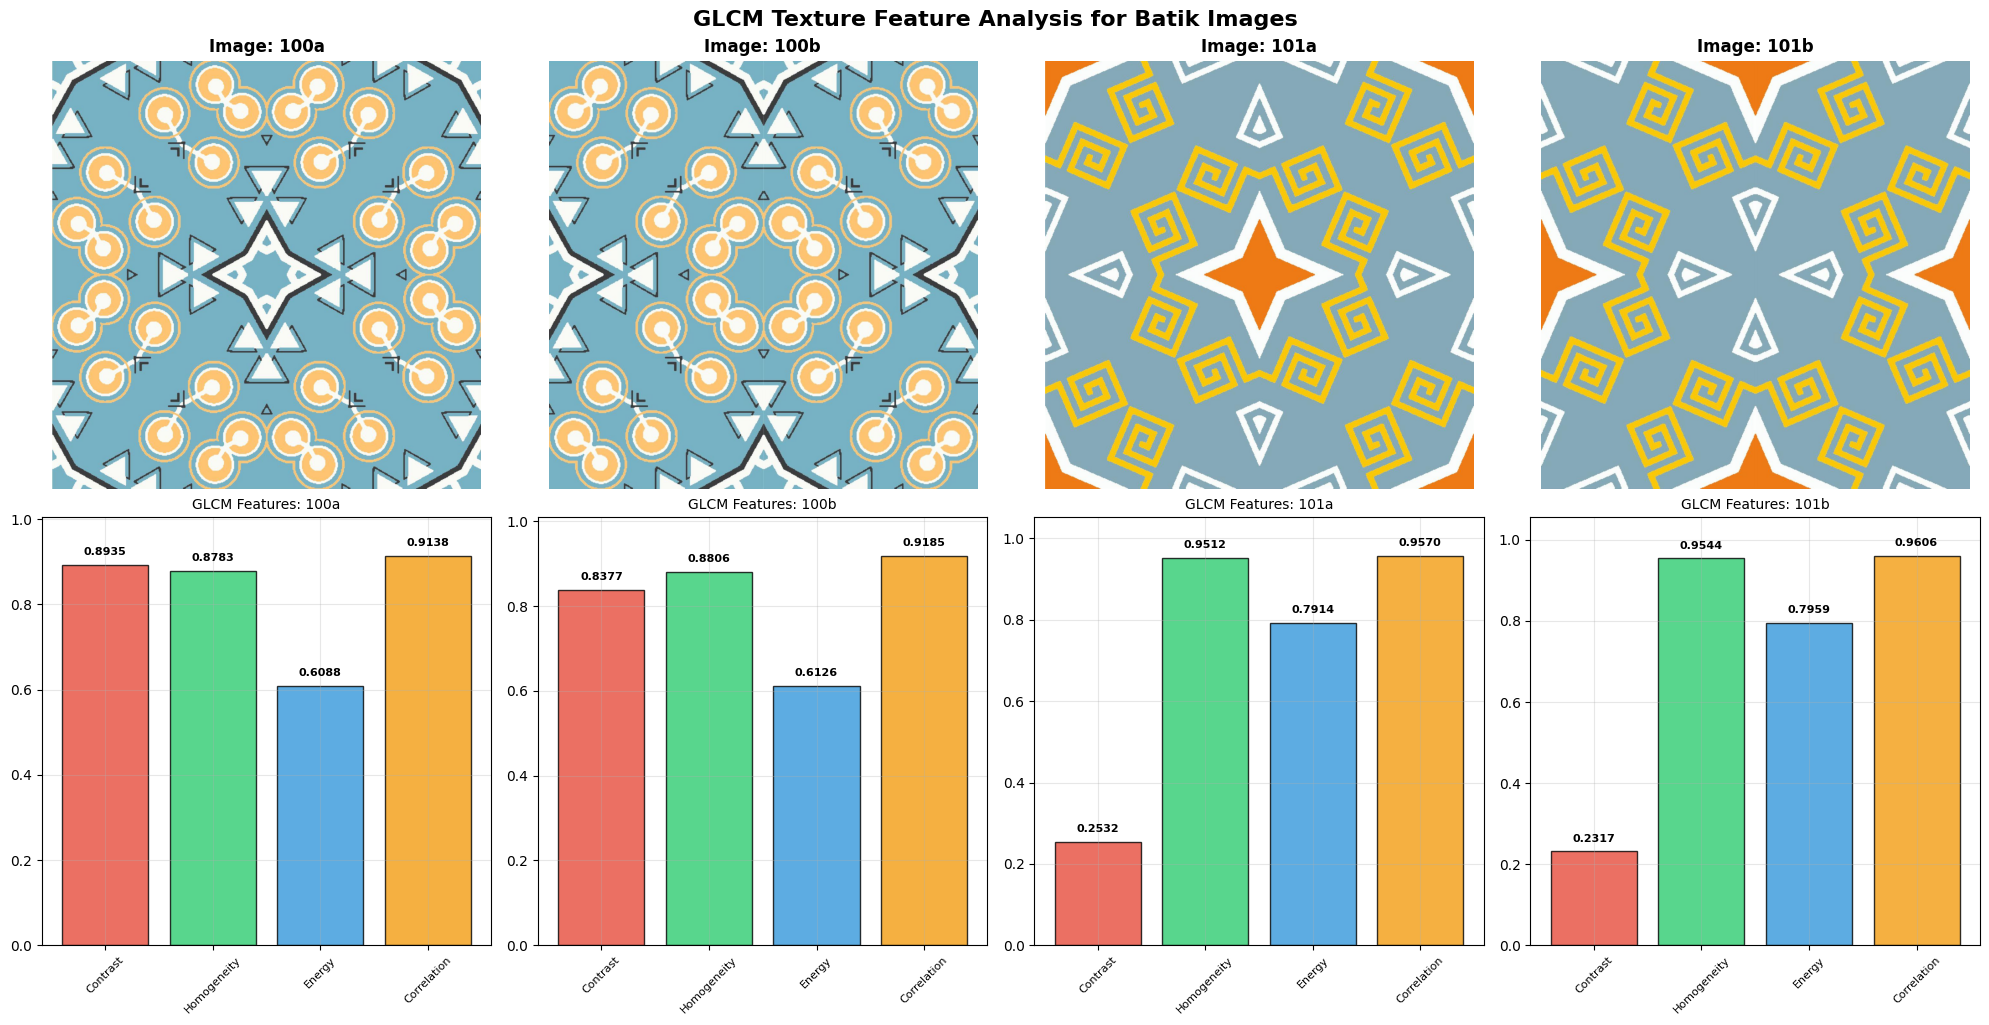

In [20]:
# Create a comparison plot
print("\nGenerating feature comparison plot...")
plot_feature_comparison(df)

In [21]:
def plot_selected_images(dataframe, selected_numbers, path_of_images):
    """
    Plot the selected images and features by number
    
    Parameters:
    dataframe: DataFrame with GLCM features
    selected_numbers: list of numbers to be displayed, example: [100, 110, 120]
    path_of_images: image folder path
    """
    # Find all image_ids that contain the selected number
    selected_ids = []
    for num in selected_numbers:
        # Find the image_id that starts with that number (include a and b)
        matching_ids = [idx for idx in dataframe.index if str(idx).startswith(str(num))]
        selected_ids.extend(matching_ids)
    
    # Remove duplicates dan sort
    selected_ids = sorted(list(set(selected_ids)))
    
    if not selected_ids:
        print(f"No images found for number: {selected_numbers}")
        return
    
    print(f"Display image for ID: {selected_ids}")
    
    n_images = len(selected_ids)
    
    fig, axes = plt.subplots(2, n_images, figsize=(5*n_images, 10))
    
    # Handle case if there is only 1 image
    if n_images == 1:
        axes = axes.reshape(-1, 1)
    
    for i, image_id in enumerate(selected_ids):
        row = dataframe.loc[image_id]
        
        image_path = os.path.join(path_of_images, f"{image_id}.png")
        if os.path.exists(image_path):
            img = plt.imread(image_path)
            axes[0, i].imshow(img)
            axes[0, i].set_title(f'Image: {image_id}', fontsize=12, fontweight='bold')
            axes[0, i].axis('off')
        else:
            axes[0, i].text(0.5, 0.5, f'Image {image_id}\nNot Found', 
                          ha='center', va='center', transform=axes[0, i].transAxes,
                          fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
            axes[0, i].set_title(f'Image: {image_id}', fontsize=12, fontweight='bold')
            axes[0, i].axis('off')
        
        # Plot features as a bar chart
        features = [
            row['Contrast Feature'],
            row['Homogeneity Feature'], 
            row['Energy Feature'],
            row['Correlation Feature']
        ]
        feature_names = ['Contrast', 'Homogeneity', 'Energy', 'Correlation']
        colors = ['#e74c3c', '#2ecc71', '#3498db', '#f39c12']
        
        bars = axes[1, i].bar(feature_names, features, color=colors, alpha=0.8, edgecolor='black')
        axes[1, i].set_title(f'GLCM Features: {image_id}', fontsize=10)
        axes[1, i].set_ylim(0, max(1, max(features) * 1.1))
        axes[1, i].tick_params(axis='x', rotation=45, labelsize=8)
        axes[1, i].grid(True, alpha=0.3)
        
        # Add values above each bar
        for bar, value in zip(bars, features):
            axes[1, i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(features)*0.02,
                           f'{value:.4f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.suptitle(f'GLCM Features for Selected Images: {selected_numbers}', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()
    
    # Also display the table for the selected image
    print(f"\nFeature values for selected images:")
    print("=" * 80)
    selected_df = dataframe.loc[selected_ids, ['Contrast Feature', 'Homogeneity Feature', 'Energy Feature', 'Correlation Feature']]
    print(selected_df.round(6))


EXAMPLE: Display a specific image
Display image for ID: ['100a', '100b', '110a', '110b', '120a', '120b']


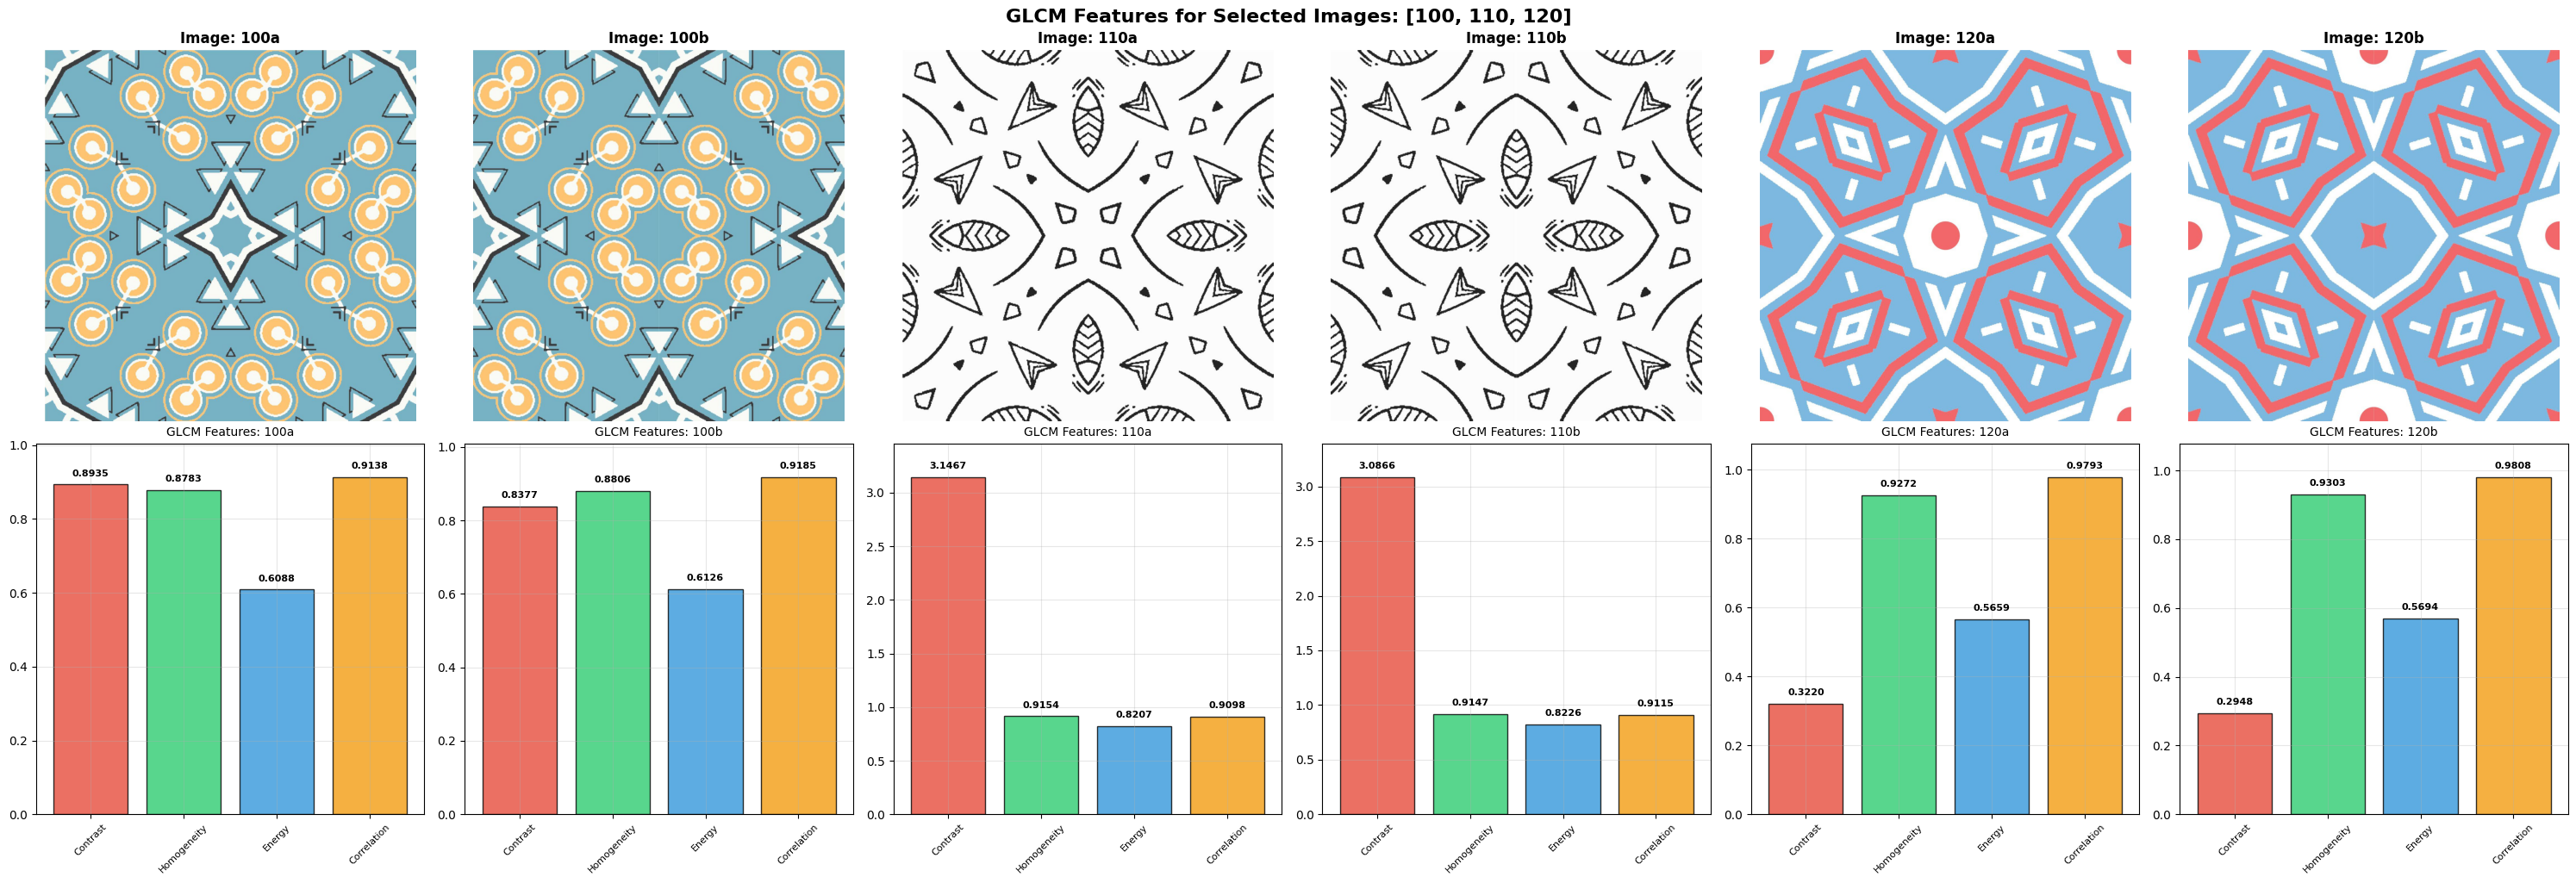


Feature values for selected images:
          Contrast Feature  Homogeneity Feature  Energy Feature  \
Image ID                                                          
100a              0.893529             0.878333        0.608779   
100b              0.837746             0.880559        0.612645   
110a              3.146739             0.915354        0.820670   
110b              3.086563             0.914696        0.822623   
120a              0.322032             0.927179        0.565926   
120b              0.294756             0.930291        0.569391   

          Correlation Feature  
Image ID                       
100a                 0.913825  
100b                 0.918455  
110a                 0.909800  
110b                 0.911455  
120a                 0.979312  
120b                 0.980802  


In [22]:
print("\n" + "="*80)
print("EXAMPLE: Display a specific image")
print("="*80)

selected_numbers = [100, 110, 120]  
plot_selected_images(df, selected_numbers, path_of_images)

In [23]:
# Tampilkan statistik ringkasan
print("\nFeature Statistics Summary:")
print("=" * 50)
print(df[['Contrast Feature', 'Homogeneity Feature', 'Energy Feature', 'Correlation Feature']].describe().round(6))


Feature Statistics Summary:
       Contrast Feature  Homogeneity Feature  Energy Feature  \
count         60.000000            60.000000       60.000000   
mean           0.776037             0.925265        0.582919   
std            0.587555             0.019749        0.107976   
min            0.217358             0.878333        0.417454   
25%            0.446294             0.917661        0.495762   
50%            0.686613             0.925301        0.584911   
75%            0.861360             0.938247        0.650156   
max            3.146739             0.961249        0.822623   

       Correlation Feature  
count            60.000000  
mean              0.968006  
std               0.020416  
min               0.909800  
25%               0.961584  
50%               0.974756  
75%               0.981140  
max               0.991298  


In [24]:
# Simpan juga ke CSV
df.to_csv('glcm_features_final.csv')
print(f"\nDataFrame also saved to: glcm_features_final.csv")
print(f"Total images processed: {len(df)}")


DataFrame also saved to: glcm_features_final.csv
Total images processed: 60
